In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')
print('model has',len(model.layers),'layers')
model.summary()

102981632/102967424 [==============================] - 2s 0us/step
model has 177 layers
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
   

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (224,224))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img('/content/drive/MyDrive/dataset')
print('loaded',len(samples),' samples')

print('classes',set(labels))

loaded 3670  samples
classes {'sunflowers', 'daisy', 'roses', 'dandelion', 'tulips'}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


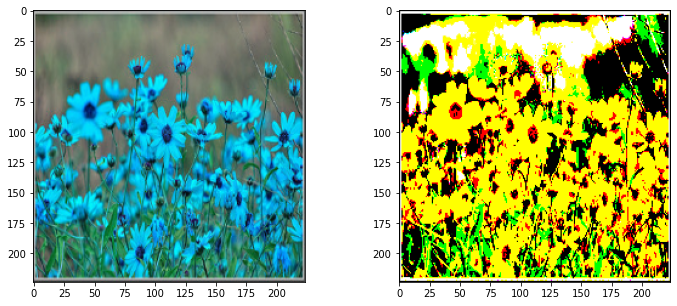

In [5]:
org_samples = samples[:]
samples = tf.keras.applications.resnet50.preprocess_input(samples)

## compare original and preprocessed
fig,(org_plot,prep_plot) = plt.subplots(1,2, figsize=(12, 5))
org_plot.imshow(org_samples[1])
prep_plot.imshow(samples[1])

In [6]:
predictions = model.predict(samples)

In [7]:
top3 = tf.keras.applications.resnet50.decode_predictions(predictions, top = 3)
for i in range(len(samples)):
#    print(labels[i],'->',top3[i])
    
## Pretty version
   print("{} -> ({}:{:.2f}, {}:{:.2f}, {}:{:.2f})".format(labels[i],
                top3[i][0][1],top3[i][0][2],
                top3[i][1][1],top3[i][1][2],
                top3[i][2][1],top3[i][2][2]))

49152/35363 [=========================================] - 0s 0us/step
sunflowers -> (umbrella:0.30, web_site:0.20, coral_reef:0.04)
sunflowers -> (pinwheel:0.84, shovel:0.05, jigsaw_puzzle:0.01)
sunflowers -> (lorikeet:0.66, macaw:0.19, peacock:0.04)
sunflowers -> (cardoon:0.28, artichoke:0.22, cicada:0.07)
sunflowers -> (daisy:0.97, pinwheel:0.01, birdhouse:0.00)
sunflowers -> (cardoon:0.58, indigo_bunting:0.12, sea_anemone:0.07)
sunflowers -> (fountain:0.55, broom:0.11, spotlight:0.06)
sunflowers -> (pot:0.50, daisy:0.15, pinwheel:0.04)
sunflowers -> (chainlink_fence:0.63, swimming_trunks:0.25, padlock:0.03)
sunflowers -> (water_bottle:0.29, coffee_mug:0.23, cup:0.09)
sunflowers -> (daisy:0.52, sea_anemone:0.09, web_site:0.05)
sunflowers -> (theater_curtain:0.45, stage:0.11, starfish:0.07)
sunflowers -> (daisy:0.54, macaw:0.16, pinwheel:0.07)
sunflowers -> (feather_boa:0.08, shower_curtain:0.07, gown:0.06)
sunflowers -> (daisy:0.49, cardoon:0.19, fly:0.09)
sunflowers -> (sea_urchin:0

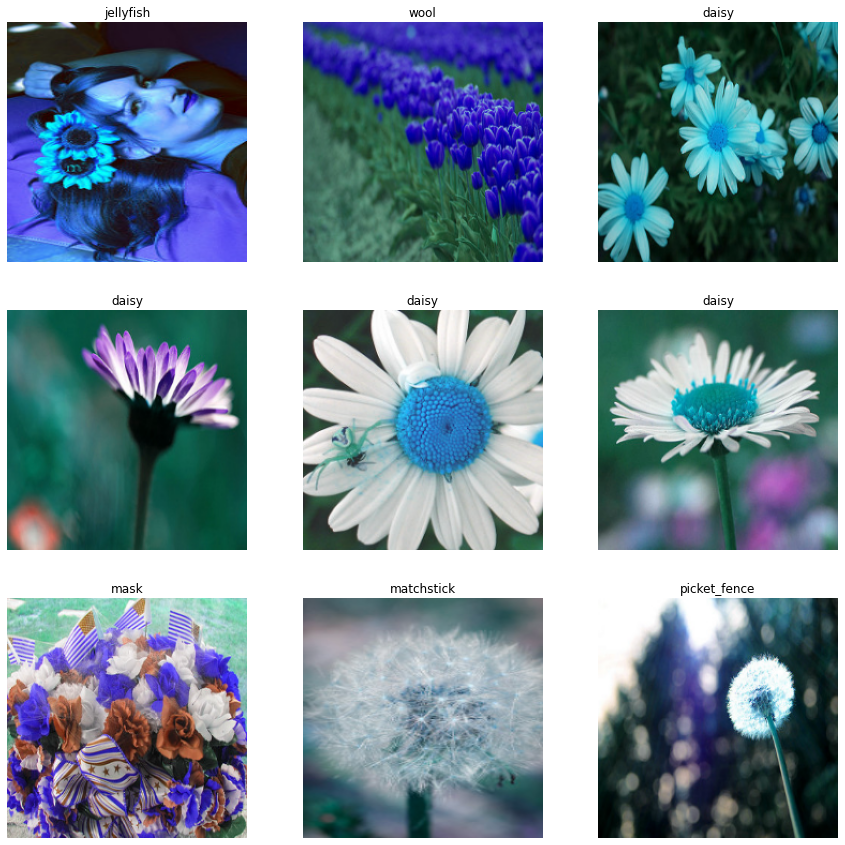

In [8]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 15))
for i in range(9):
    n = random.randrange(len(samples))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(org_samples[n])
    plt.title(tf.keras.applications.resnet50.decode_predictions(predictions, top = 1)[n][0][1])
    plt.axis("off")

In [9]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)
print("Layers:",len(base_model.layers))

94781440/94765736 [==============================] - 2s 0us/step
Layers: 175


In [10]:
print("Full model:",len(model.layers),'layers')
for i,layer in enumerate(model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

print()
print("Base model:",len(base_model.layers),'layers')
for i,layer in enumerate(base_model.layers[:3]):
    print("  ",i, layer.name, type(layer))
print('  ...')
for i,layer in enumerate(base_model.layers[171:]):
    print("  ",i+171, layer.name, type(layer))

Full model: 177 layers
   0 input_1 <class 'keras.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.layers.convolutional.ZeroPadding2D'>
   2 conv1_conv <class 'keras.layers.convolutional.Conv2D'>
  ...
   171 conv5_block3_3_conv <class 'keras.layers.convolutional.Conv2D'>
   172 conv5_block3_3_bn <class 'keras.layers.normalization.batch_normalization.BatchNormalization'>
   173 conv5_block3_add <class 'keras.layers.merge.Add'>
   174 conv5_block3_out <class 'keras.layers.core.activation.Activation'>
   175 avg_pool <class 'keras.layers.pooling.GlobalAveragePooling2D'>
   176 predictions <class 'keras.layers.core.dense.Dense'>

Base model: 175 layers
   0 input_2 <class 'keras.engine.input_layer.InputLayer'>
   1 conv1_pad <class 'keras.layers.convolutional.ZeroPadding2D'>
   2 conv1_conv <class 'keras.layers.convolutional.Conv2D'>
  ...
   171 conv5_block3_3_conv <class 'keras.layers.convolutional.Conv2D'>
   172 conv5_block3_3_bn <class 'keras.layers.normalization.batch_no

In [11]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
last_layer = tf.keras.layers.Dense(5, activation = 'softmax')(x)

model = tf.keras.models.Model(inputs = base_model.input, outputs = last_layer)

print("Combined model:",len(model.layers),'layers')

Combined model: 181 layers


In [12]:
for layer in model.layers[:175]:
    layer.trainable = False
    
for layer in model.layers[175:]:
    layer.trainable = True

In [13]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() # encoder
intlabels = encoder.fit_transform(labels)
labels = tf.keras.utils.to_categorical(intlabels)
print("One-hot labels",labels.shape)

One-hot labels (3670, 5)


In [15]:
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,
                test_size=0.5
                #random_state=42
                )
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

checkpt = ModelCheckpoint (filepath='resnet50_model.h5', save_best_only=True)
estopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

EPOCHS = 5
H = model.fit(trainSamples, trainLabels, epochs=EPOCHS, batch_size=10, validation_data=(testSamples,testLabels),
             callbacks = [estopping,checkpt]) 
print("Done")

(3670, 224, 224, 3)
Epoch 1/5
184/184 [==============================] - ETA: 0s - loss: 0.3541 - accuracy: 0.9084

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


184/184 [==============================] - 507s 3s/step - loss: 0.3541 - accuracy: 0.9084 - val_loss: 0.3563 - val_accuracy: 0.8866
Epoch 2/5
184/184 [==============================] - 502s 3s/step - loss: 0.2499 - accuracy: 0.9281 - val_loss: 0.3151 - val_accuracy: 0.9079
Epoch 3/5
184/184 [==============================] - 500s 3s/step - loss: 0.1853 - accuracy: 0.9422 - val_loss: 0.5232 - val_accuracy: 0.8910
Epoch 4/5
184/184 [==============================] - 498s 3s/step - loss: 0.2357 - accuracy: 0.9253 - val_loss: 0.4134 - val_accuracy: 0.9008
Epoch 5/5
184/184 [==============================] - 500s 3s/step - loss: 0.0923 - accuracy: 0.9695 - val_loss: 0.3838 - val_accuracy: 0.9319
Done


In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("CNN Accuracy: {:.2f}".format(accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))

[[283  15   3   5   7]
 [ 10 428   3   9   2]
 [  3   2 292   6  29]
 [  5   7   2 312   2]
 [  3   3  25  21 358]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       313
           1       0.94      0.95      0.94       452
           2       0.90      0.88      0.89       332
           3       0.88      0.95      0.92       328
           4       0.90      0.87      0.89       410

    accuracy                           0.91      1835
   macro avg       0.91      0.91      0.91      1835
weighted avg       0.91      0.91      0.91      1835

CNN Accuracy: 0.91
Cohen's Kappa: 0.89
